In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
sale=pd.read_csv('sale_customer_data.csv')
df_sale=pd.DataFrame(sale)
df_sale

,Unnamed: 0,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,z_pur,gender,age,payment_method
0,0,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,5401.53,-0.002426,Male,21.0,Debit Card
1,1,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,300.08,-1.417829,Male,20.0,Cash
2,2,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,242.40,0.705275,Female,53.0,Cash
3,3,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park,40.66,-1.417829,Female,49.0,Cash
4,4,I293112,C176086,Clothing,2,600.16,13-01-2021,Mall of Istanbul,1200.32,-0.710128,Female,32.0,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85466,85466,I675411,C513603,Toys,5,179.20,09-10-2021,Metropol AVM,896.00,1.412977,Male,50.0,Cash
85467,85467,I219422,C441542,Souvenir,5,58.65,21-09-2022,Kanyon,293.25,1.412977,Female,45.0,Credit Card
85468,85468,I325143,C569580,Food & Beverage,2,10.46,22-09-2021,Forum Istanbul,20.92,-0.710128,Male,27.0,Cash
85469,85469,I824010,C103292,Food & Beverage,2,10.46,28-03-2021,Metrocity,20.92,-0.710128,Male,63.0,Debit Card


In [ ]:
df_sale.shape

(85471, 13)

In [ ]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85471 entries, 0 to 85470
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      85471 non-null  int64  
 1   invoice_no      85471 non-null  object 
 2   customer_id     85471 non-null  object 
 3   category        85471 non-null  object 
 4   quantity        85471 non-null  int64  
 5   price           85471 non-null  float64
 6   invoice_date    85471 non-null  object 
 7   shopping_mall   85471 non-null  object 
 8   total_purchase  85471 non-null  float64
 9   z_pur           85471 non-null  float64
 10  gender          85471 non-null  object 
 11  age             85365 non-null  float64
 12  payment_method  85471 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 8.5+ MB


In [ ]:
df_sale.columns

Index(['Unnamed: 0', 'invoice_no', 'customer_id', 'category', 'quantity',
       'price', 'invoice_date', 'shopping_mall', 'total_purchase', 'z_pur',
       'gender', 'age', 'payment_method'],
      dtype='object')

In [ ]:
df_sale.reset_index(drop=True,inplace=True)
df_sale.drop('Unnamed: 0',inplace=True,axis=1)
df_sale.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,z_pur,gender,age,payment_method
0,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,5401.53,-0.002426,Male,21.0,Debit Card
1,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,300.08,-1.417829,Male,20.0,Cash
2,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,242.40,0.705275,Female,53.0,Cash
3,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park,40.66,-1.417829,Female,49.0,Cash
4,I293112,C176086,Clothing,2,600.16,13-01-2021,Mall of Istanbul,1200.32,-0.710128,Female,32.0,Credit Card


In [ ]:
df_sale['total_purchase'] = df_sale['quantity'] * df_sale['price'] #เพิ่มคลอลัม total_purchase
df_sale.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,z_pur,gender,age,payment_method
0,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,5401.53,-0.002426,Male,21.0,Debit Card
1,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,300.08,-1.417829,Male,20.0,Cash
2,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,242.40,0.705275,Female,53.0,Cash
3,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park,40.66,-1.417829,Female,49.0,Cash
4,I293112,C176086,Clothing,2,600.16,13-01-2021,Mall of Istanbul,1200.32,-0.710128,Female,32.0,Credit Card


#Find Statistics

<Axes: ylabel='Frequency'>

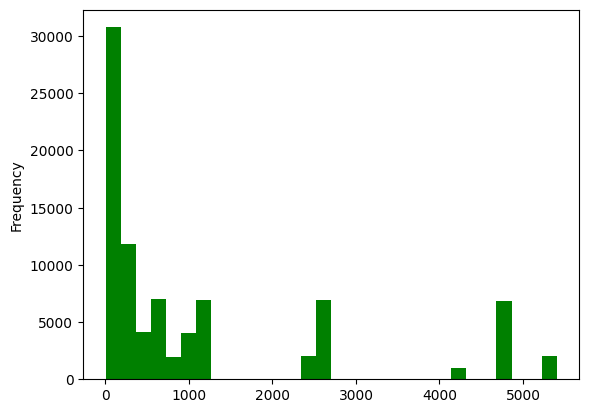

In [ ]:
#Histograme total purchase before filter outlier
df_sale['total_purchase'].plot(kind='hist',bins=30,color='green')

In [ ]:
#find Z value
mean_pur = df_sale['total_purchase'].mean()
std_pur = df_sale['total_purchase'].std()
df_sale['z_total_pur'] = (df_sale['total_purchase'] - mean_pur) / std_pur
df_sale.head(5)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,z_pur,gender,age,payment_method,z_total_pur
0,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,5401.53,-0.002426,Male,21.0,Debit Card,2.746051
1,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,300.08,-1.417829,Male,20.0,Cash,-0.539034
2,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,242.40,0.705275,Female,53.0,Cash,-0.576177
3,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park,40.66,-1.417829,Female,49.0,Cash,-0.706088
4,I293112,C176086,Clothing,2,600.16,13-01-2021,Mall of Istanbul,1200.32,-0.710128,Female,32.0,Credit Card,0.040677


In [ ]:
df_sale.drop('z_pur',axis=1,inplace=True)
df_sale.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,gender,age,payment_method,z_total_pur
0,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,5401.53,Male,21.0,Debit Card,2.746051
1,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,300.08,Male,20.0,Cash,-0.539034
2,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,242.40,Female,53.0,Cash,-0.576177
3,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park,40.66,Female,49.0,Cash,-0.706088
4,I293112,C176086,Clothing,2,600.16,13-01-2021,Mall of Istanbul,1200.32,Female,32.0,Credit Card,0.040677


In [ ]:
df_sale['z_total_pur'].describe()

,z_total_pur
count,8.547100e+04
mean,2.259544e-16
std,1.000000e+00
min,-7.289027e-01
25%,-6.642887e-01
50%,-4.966231e-01
75%,4.067680e-02
max,2.746051e+00


## Check Outlier

In [ ]:
#before
mean_old = df_sale['total_purchase'].mean()
print(mean_old)

1137.152474640521


In [ ]:
#after
Q1 = df_sale['total_purchase'].quantile(0.25)
Q3 = df_sale['total_purchase'].quantile(0.75)
IQR = Q3 - Q1

# กำหนดขอบเขตของค่า outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# กรองค่า outliers ออกจาก DataFrame
df_filtered = df_sale[(df_sale['total_purchase'] >= lower_bound) & (df_sale['total_purchase'] <= upper_bound)]

mean_pur = df_filtered['total_purchase'].mean()
print(mean_pur)

651.3849275247316


<Axes: ylabel='Frequency'>

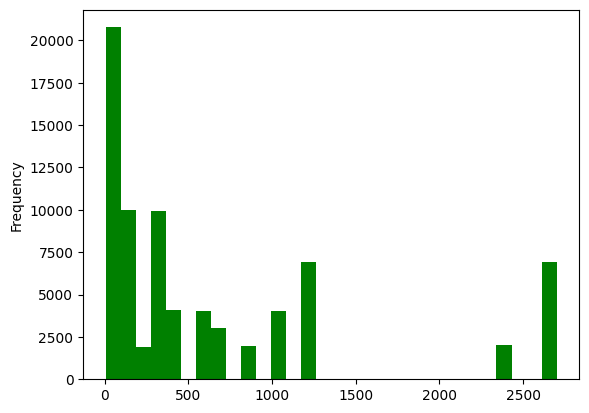

In [ ]:
#Histogram After filter outlier
df_filtered['total_purchase'].plot(kind='hist',bins=30,color='green')

##Box plot

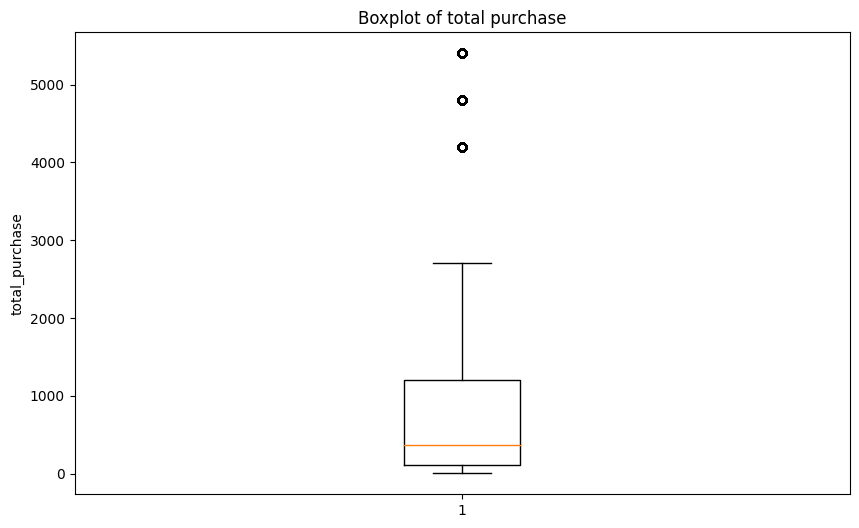

In [ ]:
#before
plt.figure(figsize=(10, 6))
plt.boxplot(df_sale['total_purchase'])
plt.title('Boxplot of total purchase')
plt.ylabel('total_purchase')
plt.show()

In [ ]:
df_sale['total_purchase'].describe()

,total_purchase
count,85471.000000
mean,1137.152475
std,1552.912965
min,5.230000
25%,105.570000
50%,365.940000
75%,1200.320000
max,5401.530000


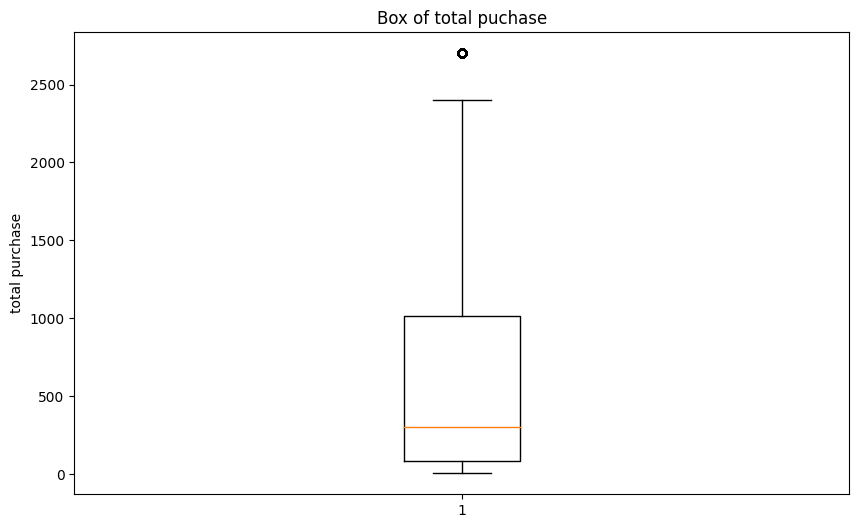

In [ ]:
#after
plt.figure(figsize=[10,6])
plt.boxplot(df_filtered['total_purchase'])
plt.title('Box of total puchase')
plt.ylabel('total purchase')
plt.show()

In [ ]:
df_filtered['total_purchase'].describe()

,total_purchase
count,75612.000000
mean,651.384928
std,816.322244
min,5.230000
25%,83.680000
50%,300.080000
75%,1016.500000
max,2700.720000


## Check Normal Distribution

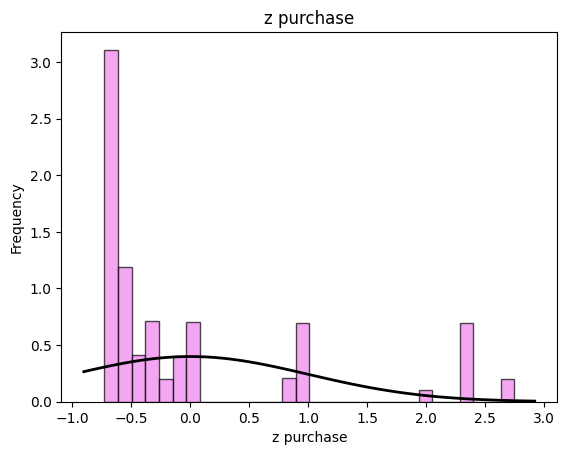

In [ ]:
from scipy.stats import norm

# สร้าง histogram
plt.hist(df_sale['z_total_pur'], bins=30, alpha=0.7, color='violet', edgecolor='black', density=True)

# คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐาน
mean = np.mean(df_sale['z_total_pur'])
std_dev = np.std(df_sale['z_total_pur'])

# สร้างค่าบนแกน x สำหรับการแจกแจงปกติ
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# คำนวณค่า y สำหรับเส้นโค้งการแจกแจงปกติ
p = norm.pdf(x, mean, std_dev)

# เพิ่มเส้นโค้งการแจกแจงปกติบน histogram
plt.plot(x, p, 'k', linewidth=2)
plt.title('z purchase')
plt.xlabel('z purchase')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df_sale['z_total_pur'].value_counts()

,count
z_total_pur,
0.040677,6950
1.006861,6907
2.359519,6849
-0.539034,6841
-0.496623,3072
-0.077694,3055
-0.313342,3010
-0.728903,3002
-0.701960,2992


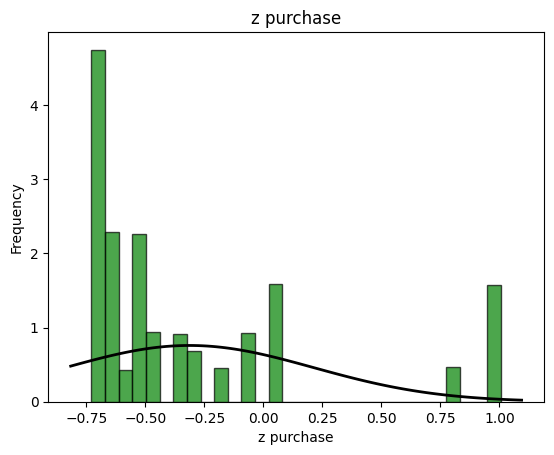

In [ ]:
#After
from scipy.stats import norm

# สร้าง histogram
plt.hist(df_filtered['z_total_pur'], bins=30, alpha=0.7, color='green', edgecolor='black', density=True)

# คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐาน
mean = np.mean(df_filtered['z_total_pur'])
std_dev = np.std(df_filtered['z_total_pur'])

# สร้างค่าบนแกน x สำหรับการแจกแจงปกติ
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# คำนวณค่า y สำหรับเส้นโค้งการแจกแจงปกติ
p = norm.pdf(x, mean, std_dev)

# เพิ่มเส้นโค้งการแจกแจงปกติบน histogram
plt.plot(x, p, 'k', linewidth=2)
plt.title('z purchase')
plt.xlabel('z purchase')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df_filtered['z_total_pur'].value_counts()

,count
z_total_pur,
0.040677,6950
1.006861,6907
-0.539034,6841
-0.496623,3072
-0.077694,3055
-0.313342,3010
-0.728903,3002
-0.701960,2992
-0.648074,2989


In [ ]:
df_filtered['total_purchase'].describe()
print(df_filtered.describe())

           quantity         price  total_purchase           age   z_total_pur
count  75612.000000  75612.000000    75612.000000  75522.000000  75612.000000
mean       2.623882    273.314912      651.384928     43.414727     -0.312811
std        1.347026    330.215213      816.322244     14.998314      0.525672
min        1.000000      5.230000        5.230000     18.000000     -0.728903
25%        1.000000     35.190000       83.680000     30.000000     -0.678385
50%        2.000000    121.980000      300.080000     43.000000     -0.539034
75%        4.000000    300.080000     1016.500000     56.000000     -0.077694
max        5.000000   1200.340000     2700.720000     69.000000      1.006861


##ใช้ Median เปนค่ากลางแทนการใช้ Mean



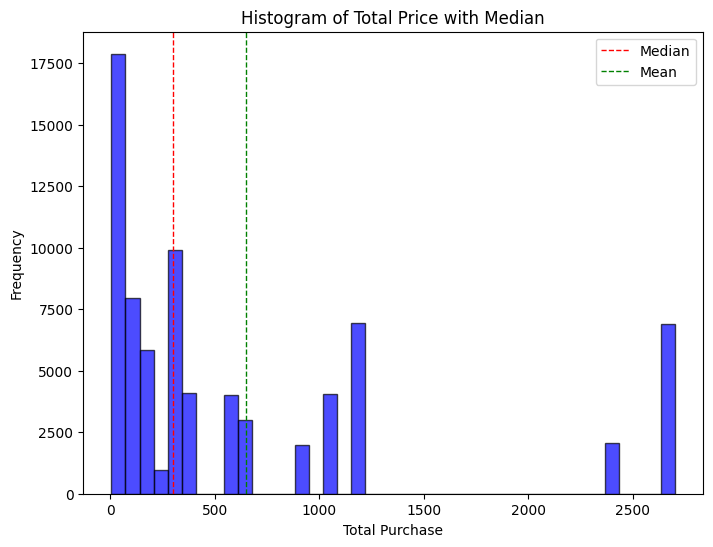

In [ ]:
#เนื่องจาก กราฟเบ้ขวาเราจะใช้ค่า Median เปนค่ากลาง
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['total_purchase'], bins=40, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(df_filtered['total_purchase'].median(), color='red', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(df_filtered['total_purchase'].mean(), color='green', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Total Price with Median')
plt.xlabel('Total Purchase')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#Median of total purchase
df_filtered['total_purchase'].median()

300.08

In [ ]:
#Mean of total purchase
df_filtered['total_purchase'].mean()

651.3849275247316


# Missing Values

In [ ]:
#Rename
df_sale2 = df_filtered.rename(columns={'df_filtered': 'df_sale2'})
df_sale2.head(5)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,gender,age,payment_method,z_total_pur
1,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,300.08,Male,20.0,Cash,-0.539034
2,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,242.40,Female,53.0,Cash,-0.576177
3,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park,40.66,Female,49.0,Cash,-0.706088
4,I293112,C176086,Clothing,2,600.16,13-01-2021,Mall of Istanbul,1200.32,Female,32.0,Credit Card,0.040677
5,I293455,C159642,Clothing,3,900.24,04-11-2021,Metrocity,2700.72,Male,69.0,Credit Card,1.006861


In [ ]:
# Check value is nan
df_sale2.isna().sum()

,0
invoice_no,0
customer_id,0
category,0
quantity,0
price,0
invoice_date,0
shopping_mall,0
total_purchase,0
gender,0
age,90


In [ ]:
# Dropna
df_sale2.dropna(inplace=True)
df_sale2.isna().sum()

,0
invoice_no,0
customer_id,0
category,0
quantity,0
price,0
invoice_date,0
shopping_mall,0
total_purchase,0
gender,0
age,0


# Explore Data Analysis (EDA)

In [ ]:
#pie chart female vs male
gender=df_sale2['gender'].value_counts()
pie_1 = px.pie(
    labels = gender.index,
    values = gender.values,
    title = 'Male vs Female Distribution',
    names = gender.index,
    hole = 0.4
)

pie_1.update_traces(
    textposition = 'inside',
    textfont_size = 15,
    textinfo = 'percent'
)

pie_1.show()

In [ ]:
df_sale2['gender'].value_counts()

,count
gender,
Female,45195
Male,30327


In [ ]:
#Bar Chart Categories
categories = df_sale2.category.value_counts()

bar_1 = px.bar(
    x = categories.index,
    y = categories.values,
    color = categories.values,
    color_continuous_scale = 'aggrnyl',
    title = 'Number of Categories'
)

bar_1.update_layout(
    xaxis_title = 'Sales Category',
    coloraxis_showscale = False,
    yaxis_title = 'Number of Sales'
)

bar_1.show()

In [ ]:
df_sale2['category'].value_counts() # the most is Clothing

,count
category,
Clothing,20672
Cosmetics,15084
Food & Beverage,14761
Toys,10071
Souvenir,4991
Books,4976
Shoes,3982
Technology,985


In [ ]:
#pie chart Categories
cate=df_sale2['category'].value_counts()
pie_1 = px.pie(
    labels = cate.index,
    values = cate.values,
    title = 'Category ratio',
    names = cate.index,
    hole = 0.4
)

pie_1.update_traces(
    textposition = 'inside',
    textfont_size = 15,
    textinfo = 'percent'
)

pie_1.show()

In [ ]:
df_sale2['category'].value_counts()

,count
category,
Clothing,20672
Cosmetics,15084
Food & Beverage,14761
Toys,10071
Souvenir,4991
Books,4976
Shoes,3982
Technology,985


In [ ]:
cat_gender = df_sale2.groupby(
    ['category',
     'gender'
    ],
    as_index = False
).agg({
    'quantity':pd.Series.count
})

cat_gender.sort_values(
    'quantity',
    ascending = False,
    inplace = True
)

cat_gender

,category,gender,quantity
2,Clothing,Female,12375
4,Cosmetics,Female,9063
6,Food & Beverage,Female,8792
3,Clothing,Male,8297
14,Toys,Female,6078
5,Cosmetics,Male,6021
7,Food & Beverage,Male,5969
15,Toys,Male,3993
10,Souvenir,Female,3010
0,Books,Female,2902


In [ ]:
bar_gencate = px.bar(
    x = cat_gender.category,
    y = cat_gender.quantity,
    color = cat_gender.gender,
    title = 'Number of Sales per Category Distributed Across each Gender'
)

bar_gencate.update_layout(
    xaxis_title = 'Sales Category',
    yaxis_title = 'Quantity Sold'
)

bar_gencate.show()

In [ ]:
df_sale2.groupby(['category','gender']).agg({'quantity':pd.Series.count})

quantity
category        gender          
Books           Female      2902
                Male        2074
Clothing        Female     12375
                Male        8297
Cosmetics       Female      9063
                Male        6021
Food & Beverage Female      8792
                Male        5969
Shoes           Female      2391
                Male        1591
Souvenir        Female      3010
                Male        1981
Technology      Female       584
                Male         401
Toys            Female      6078
                Male        3993

In [ ]:
# แยก year
year=df_sale2['sales_year'] = pd.DatetimeIndex(df_sale2['invoice_date']).year
year

Index([2021, 2021, 2022, 2021, 2021, 2021, 2022, 2022, 2022, 2022,
       ...
       2021, 2023, 2021, 2023, 2023, 2021, 2022, 2021, 2021, 2022],
      dtype='int32', name='invoice_date', length=75522)

In [ ]:
top_year = df_sale2.groupby(['sales_year'],as_index=False).agg({'quantity':pd.Series.count})  #as_index = false คือคอลัมมันจะไปปรากฎด้านบนปกติ

top_year.sort_values(
    by = 'quantity' , ascending=False , inplace = True )

top_year

,sales_year,quantity
1,2022,34585
0,2021,34433
2,2023,6504


<Axes: xlabel='sales_year'>

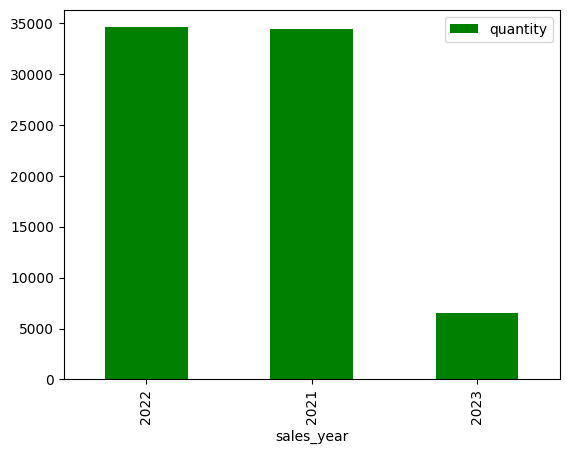

In [ ]:
# Bar chart for compare year about quantity
bar_y=top_year.sort_values(by='quantity',ascending=False)
bar_y.plot(kind='bar',x='sales_year',y='quantity',color='green')

In [ ]:
#pie chart for ratio every shopping mall
mall=df_sale2['shopping_mall'].value_counts()
pie_shop = px.pie(
    labels = mall.index,
    values = mall.values,
    title = 'Shopping Malls Sales Distribution',
    names = mall.index,
    hole = 0.4
)

pie_shop.update_traces(
    textposition = 'inside',
    textfont_size = 15,
    textinfo = 'percent'
)

pie_shop.show()

In [ ]:
df_sale2['shopping_mall'].value_counts()

,count
shopping_mall,
Mall of Istanbul,15089
Kanyon,15046
Metrocity,11440
Metropol AVM,7727
Istinye Park,7402
Zorlu Center,3867
Cevahir AVM,3791
Forum Istanbul,3785
Viaport Outlet,3743


In [ ]:
# payment from each shopping mall
mall_pay=df_sale2.groupby(['shopping_mall','payment_method'],as_index=False)\
.agg({'quantity':pd.Series.count}).sort_values('quantity',ascending=False)
bar_pay=px.bar(
    x=mall_pay.shopping_mall,
    y=mall_pay.quantity,
    color=mall_pay.payment_method,
    title='Payment Method per Shopping mall'
)
bar_pay.update_layout(
    xaxis_title='Shoping Mall',
    yaxis_title='Quantity'
)
bar_pay.show()

In [ ]:
df_sale2.groupby(['shopping_mall','payment_method'],as_index=False).agg({'quantity':pd.Series.count}).sort_values('quantity',ascending=False).value_counts()

shopping_mall      payment_method  quantity
Cevahir AVM        Cash            1681        1
                   Credit Card     1367        1
Zorlu Center       Credit Card     1317        1
                   Cash            1797        1
Viaport Outlet     Debit Card      739         1
                   Credit Card     1303        1
                   Cash            1701        1
Metropol AVM       Debit Card      1593        1
                   Credit Card     2661        1
                   Cash            3473        1
Metrocity          Debit Card      2318        1
                   Credit Card     4062        1
                   Cash            5060        1
Mall of Istanbul   Debit Card      3056        1
                   Credit Card     5329        1
                   Cash            6704        1
Kanyon             Debit Card      3043        1
                   Credit Card     5296        1
                   Cash            6707        1
Istinye Park       Debit Card      1467        1
                   Credit Card     2571        1
                   Cash            3364        1
Forum Istanbul     Debit Card      762         1
                   Credit Card     1340        1
                   Cash            1683        1
Emaar Square Mall  Debit Card      775         1
                   Credit Card     1292        1
                   Cash            1565        1
Cevahir AVM        Debit Card      743         1
Zorlu Center       Debit Card      753         1
Name: count, dtype: int64

In [ ]:
# pie chart from payment credit card
payment_type = df_sale2.payment_method.value_counts()

pie_pay=px.pie(
    labels=payment_type.index,
    values=payment_type.values,
    title='Payment Method Distribution',
    names=payment_type.index,
    hole=0.4
)
pie_pay.update_traces(
    textposition='inside',
    textfont_size=15,
    textinfo='percent'
)
pie_pay.show()

In [ ]:
df_sale2.payment_method.value_counts()

,count
payment_method,
Cash,33735
Credit Card,26538
Debit Card,15249


## Correlation Analysis

In [ ]:
df_sale2.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'invoice_date', 'shopping_mall', 'total_purchase', 'gender', 'age',
       'payment_method', 'z_total_pur', 'sales_year'],
      dtype='object')

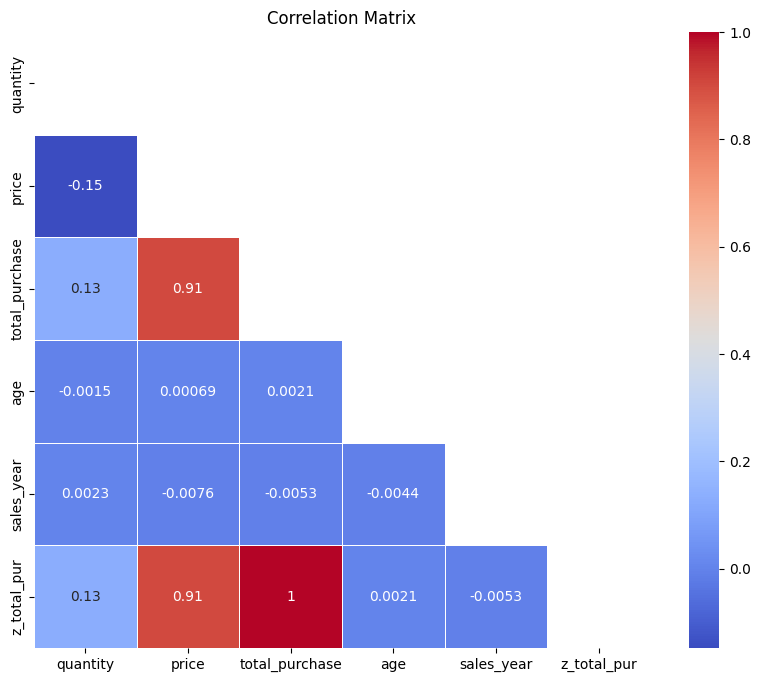

In [ ]:
# ระบุคอลัมน์ที่เป็นเชิงปริมาณ
numeric_cols = ['quantity','price','total_purchase','age','sales_year','z_total_pur']
correlation_matrix = df_sale2[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
cols=['sales_year','age','z_pur','quantity','price','total_purchase']

In [ ]:
df_sale2.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'invoice_date', 'shopping_mall', 'total_purchase', 'gender', 'age',
       'payment_method', 'z_total_pur', 'sales_year'],
      dtype='object')

## PCA (Principal Component Analysis)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลข
numeric_columns = ['quantity', 'price', 'total_purchase', 'z_total_pur', 'age']

# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่เป็นตัวเลข
df_numeric = df_sale2[['quantity', 'price', 'total_purchase', 'z_total_pur', 'age']]

# สร้าง StandardScaler
scaler = StandardScaler()

# ปรับข้อมูล
scaled_data = scaler.fit_transform(df_numeric)

# เปลี่ยนกลับเป็น DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=numeric_columns)

# เลือกเฉพาะคอลัมน์ที่ไม่ได้ปรับมาตรฐาน
non_numeric_columns = [col for col in df_sale2.columns if col not in numeric_columns]
df_non_numeric = df_sale2[non_numeric_columns]

# รวม DataFrame ที่มีข้อมูลที่ปรับมาตรฐานแล้วกับข้อมูลที่ไม่ได้ปรับมาตรฐาน
df_scaled_all = pd.concat([df_scaled, df_non_numeric], axis=1)
df_scaled_all.head(10)

,quantity,price,total_purchase,z_total_pur,age,invoice_no,customer_id,category,invoice_date,shopping_mall,gender,payment_method,sales_year
0,-1.205615,0.081130,-0.430305,-0.430305,-1.561168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.021628,-0.644138,-0.500967,-0.500967,0.639094,I127801,C266599,Clothing,09-11-2021,Metrocity,Male,Cash,2021.0
2,-1.205615,-0.704526,-0.748111,-0.748111,0.372396,I337046,C189076,Books,24-10-2021,Kanyon,Female,Cash,2021.0
3,-0.463200,0.989924,0.672547,0.672547,-0.761072,I121056,C151197,Cosmetics,13-03-2022,Istinye Park,Female,Cash,2022.0
4,0.279214,1.898719,2.510634,2.510634,1.705888,I293112,C176086,Clothing,13-01-2021,Mall of Istanbul,Female,Credit Card,2021.0
5,-0.463200,0.989924,0.672547,0.672547,1.105816,I293455,C159642,Clothing,04-11-2021,Metrocity,Male,Credit Card,2021.0
6,-0.463200,-0.795987,-0.772294,-0.772294,-0.494374,I326945,C283361,Clothing,22-08-2021,Kanyon,Female,Credit Card,2021.0
7,-1.205615,-0.781783,-0.779363,-0.779363,-0.961096,I306368,C240286,Food & Beverage,25-12-2022,Metrocity,Female,Cash,2022.0
8,1.021628,-0.393498,-0.095421,-0.095421,1.572539,I139207,C191708,Books,28-10-2022,Emaar Square Mall,Female,Credit Card,2022.0
9,-0.463200,0.989924,0.672547,0.672547,-1.227795,I640508,C225330,Toys,31-07-2022,Metrocity,Female,Debit Card,2022.0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# สร้าง SimpleImputer โดยใช้ median เพื่อเติมค่าที่ขาดหายไป
imputer = SimpleImputer(strategy='median')

# ใช้ imputer เพื่อเติมค่าที่ขาดหายไปใน df_scaled
df_scaled_imputed = imputer.fit_transform(df_scaled)

# สร้าง PCA object
pca = PCA()

# ทำ PCA บนข้อมูลที่เติมค่า NaN แล้ว
pca_result = pca.fit_transform(df_scaled_imputed)

num_pcs = pca_result.shape[1]  # หาจำนวน principal components ที่ได้
pc_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]  # สร้างชื่อคอลัมน์ตามจำนวน PCs ที่ได้

pca_result_df = pd.DataFrame(data=pca_result, columns=pc_columns)

# เรียกดูหัวตาราง
pca_result_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.506565,-1.211257,-1.591088,0.111108,-4.823723e-15
1,-0.906830,1.043010,0.666281,0.121965,-5.713838e-14
2,-1.316084,-1.133767,0.346763,-0.264834,8.763377e-14
3,1.322821,-0.548841,-0.777088,0.153060,-1.434260e-16
4,4.014532,0.179364,1.705536,-0.377127,7.005298e-17


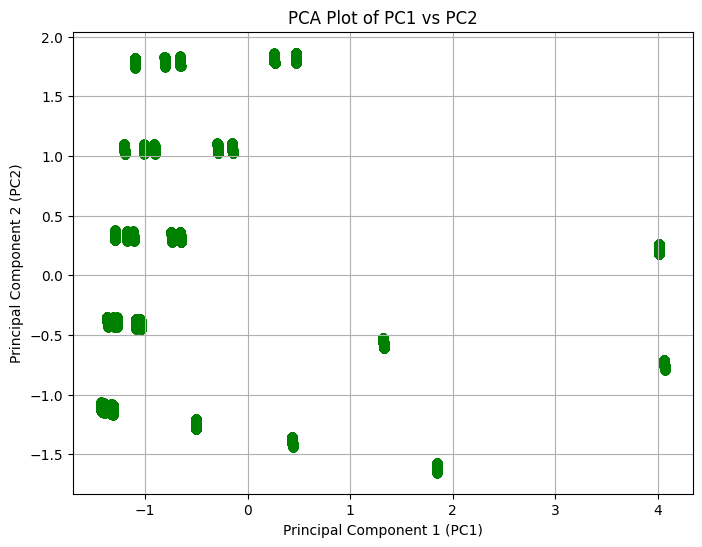

In [ ]:
# สร้าง scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_result_df['PC1'], pca_result_df['PC2'], alpha=0.7,color='green')
plt.title('PCA Plot of PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()


In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance_ratio_percent = explained_variance * 100
for i, variance in enumerate(explained_variance_ratio_percent):
    print(f"Principal Component {i+1}: {variance:.2f}%")


Principal Component 1: 57.54%
Principal Component 2: 21.07%
Principal Component 3: 20.00%
Principal Component 4: 1.40%
Principal Component 5: 0.00%


In [ ]:
pca_result_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.703151,-0.427150,0.417737,-1.801639,0.110857,1.067942e-12
1,1.517956,-0.638126,-1.162558,-0.260220,0.104865,6.169073e-17
2,-1.569352,-1.208611,0.140979,0.671057,-0.212979,5.903898e-17
3,-0.806002,1.102910,-0.142581,-1.231988,0.127720,-2.084066e-17
4,0.105189,3.161681,-1.883681,0.513755,-0.367119,1.021267e-16
...,...,...,...,...,...,...
75517,2.507125,0.294138,-1.017201,-0.397034,-0.053514,7.689205e-17
75518,2.561345,-0.501663,0.317909,0.480307,0.208286,8.235639e-17
75519,-0.524214,-1.164735,0.074628,-1.478795,-0.114088,-3.110929e-17
75520,-0.529285,-1.160015,-1.631669,0.209358,-0.110844,3.692525e-17


##Predict Customer in Time series

In [ ]:
from datetime import datetime

In [ ]:
# change pattern date time from %Y-%m-%d to %d-%m-%Y
new_date=[]
for i in df_sale2['invoice_date']:
    form = "%d-%m-%Y"
    parsed_date = datetime.strptime(i, form)
    new_date.append(parsed_date)


In [ ]:
df_sale2['invoice_date'] = pd.Series(new_date)
df_sale2.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,gender,age,payment_method,z_total_pur,sales_year
1,I127801,C266599,Clothing,1,300.08,2021-10-24,Metrocity,300.08,Male,20.0,Cash,-0.539034,2021
2,I337046,C189076,Books,4,60.60,2022-03-13,Kanyon,242.40,Female,53.0,Cash,-0.576177,2021
3,I121056,C151197,Cosmetics,1,40.66,2021-01-13,Istinye Park,40.66,Female,49.0,Cash,-0.706088,2022
4,I293112,C176086,Clothing,2,600.16,2021-11-04,Mall of Istanbul,1200.32,Female,32.0,Credit Card,0.040677,2021
5,I293455,C159642,Clothing,3,900.24,2021-08-22,Metrocity,2700.72,Male,69.0,Credit Card,1.006861,2021


In [ ]:
#sorting date time
df_sale2 = df_sale2.sort_values(by='invoice_date',ascending=True)
df_sale2.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,gender,age,payment_method,z_total_pur,sales_year
22118,I131698,C544568,Cosmetics,5,203.30,2021-01-01,Zorlu Center,1016.50,Female,35.0,Credit Card,-0.077694,2022
42076,I206462,C749947,Shoes,1,600.17,2021-01-01,Kanyon,600.17,Female,39.0,Cash,-0.345790,2021
21215,I229808,C118617,Clothing,3,900.24,2021-01-01,Mall of Istanbul,2700.72,Female,43.0,Cash,1.006861,2023
13355,I289901,C191886,Technology,1,1050.00,2021-01-01,Mall of Istanbul,1050.00,Female,52.0,Cash,-0.056122,2022
74917,I178735,C176124,Clothing,3,900.24,2021-01-01,Emaar Square Mall,2700.72,Male,23.0,Debit Card,1.006861,2021


In [ ]:
df_sale2 = df_sale2.reset_index()
df_sale2 = df_sale2.drop('index',axis=1)
df_sale2.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,gender,age,payment_method,z_total_pur,sales_year
0,I131698,C544568,Cosmetics,5,203.30,2021-01-01,Zorlu Center,1016.50,Female,35.0,Credit Card,-0.077694,2022
1,I206462,C749947,Shoes,1,600.17,2021-01-01,Kanyon,600.17,Female,39.0,Cash,-0.345790,2021
2,I229808,C118617,Clothing,3,900.24,2021-01-01,Mall of Istanbul,2700.72,Female,43.0,Cash,1.006861,2023
3,I289901,C191886,Technology,1,1050.00,2021-01-01,Mall of Istanbul,1050.00,Female,52.0,Cash,-0.056122,2022
4,I178735,C176124,Clothing,3,900.24,2021-01-01,Emaar Square Mall,2700.72,Male,23.0,Debit Card,1.006861,2021


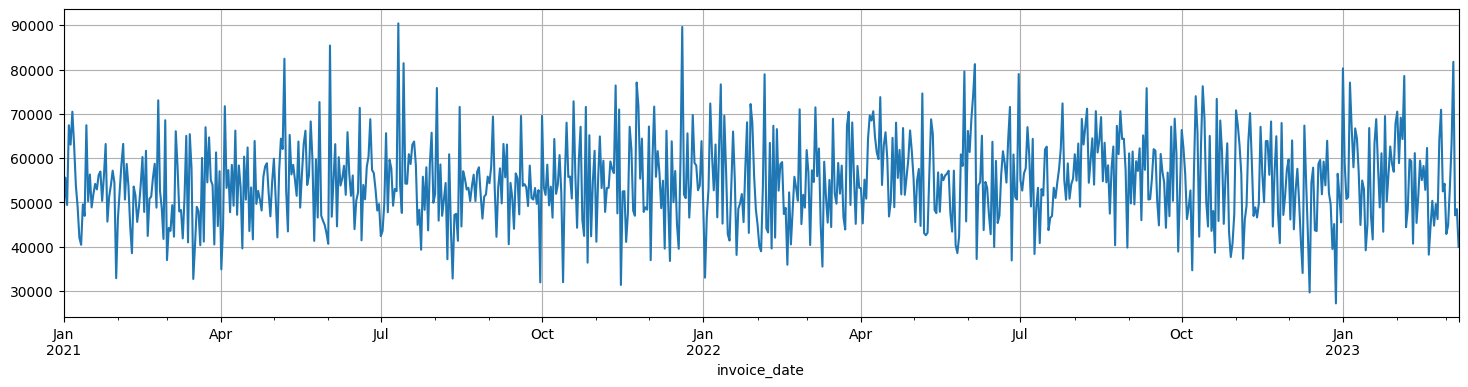

In [ ]:
#plot time series by invoice date
plt.figure(figsize=(18, 4))
df_sale2.groupby('invoice_date')['total_purchase'].sum().plot(kind='line')
plt.grid()
plt.show()

In [ ]:
date = pd.DataFrame(df_sale2.groupby('invoice_date')['total_purchase'].sum())

In [ ]:
lim='2022-09-01'

In [ ]:

train=date[date.index<=lim]
test=date[date.index>lim]
xtrain = train.index
ytrain = train['total_purchase']
xtest=test.index
ytest=test['total_purchase']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr_model = lr.fit(xtrain.values.reshape(-1,1),ytrain)

In [ ]:
ypred = lr_model.predict(xtest.values.astype('float').reshape(-1,1))

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 8715.500396845615
Mean Squared Error (MSE): 112367888.43403164
Root Mean Squared Error (RMSE): 10600.372089414202


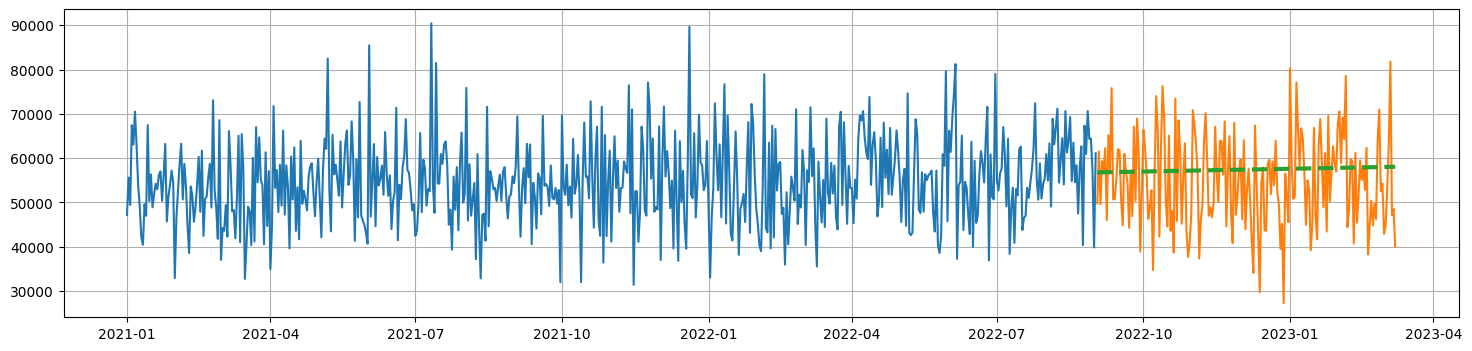

In [ ]:
# plot Time series
plt.figure(figsize=(18,4))
plt.plot(xtrain,ytrain)
plt.plot(xtest,ytest)
plt.plot(xtest,ypred,linewidth=3,linestyle='--')
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller


result = adfuller(date['total_purchase'])  # Replace 'column_name' with the name of your data column

# Extract and print the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}') #ค่าติดลบแปลว่าไม่เปลี่ยนแปลงตามกาลเวลา
print(f'p-value: {p_value}')
print('Critical Values:')

ADF Statistic: -28.240484194652623
p-value: 0.0
Critical Values:


#Arima model

In [ ]:
# use arima to predict time series
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(test,order=(1,1,1))
result = model.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:         total_purchase   No. Observations:                  188
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2002.164
Date:                Sat, 17 Aug 2024   AIC                           4010.327
Time:                        07:07:33   BIC                           4020.020
Sample:                    09-02-2022   HQIC                          4014.255
                         - 03-08-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1452      0.089      1.636      0.102      -0.029       0.319
ma.L1         -0.9975      0.097    -10.289      0.000      -1.188      -0.808
sigma2      1.281e+08   4.46e-10   2.87e+17      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



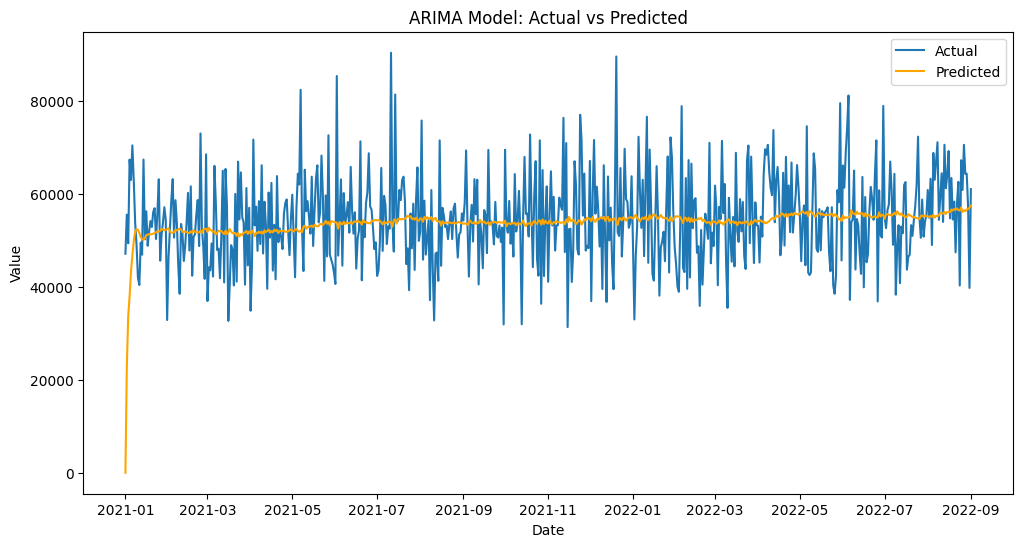

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# สมมติว่าคุณมีข้อมูล train เป็น Series
# train = pd.Series([...])

# สร้างและฝึกโมเดล ARIMA
model = ARIMA(train, order=(1, 1, 1))
result = model.fit()

# ทำนายค่าข้อมูล
predict = result.predict(start=0, end=len(train)-1)

# วาดกราฟ
plt.figure(figsize=(12, 6))  # กำหนดขนาดกราฟให้กว้าง 12 นิ้ว และสูง 6 นิ้ว

# วาดเส้นข้อมูลจริง
plt.plot(train.index, train, label='Actual',)

# วาดเส้นข้อมูลที่พยากรณ์
plt.plot(train.index, predict, label='Predicted', color='orange')

# เพิ่มชื่อกราฟและแกน
plt.title('ARIMA Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')

# เพิ่ม legend
plt.legend()

# แสดงกราฟ
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



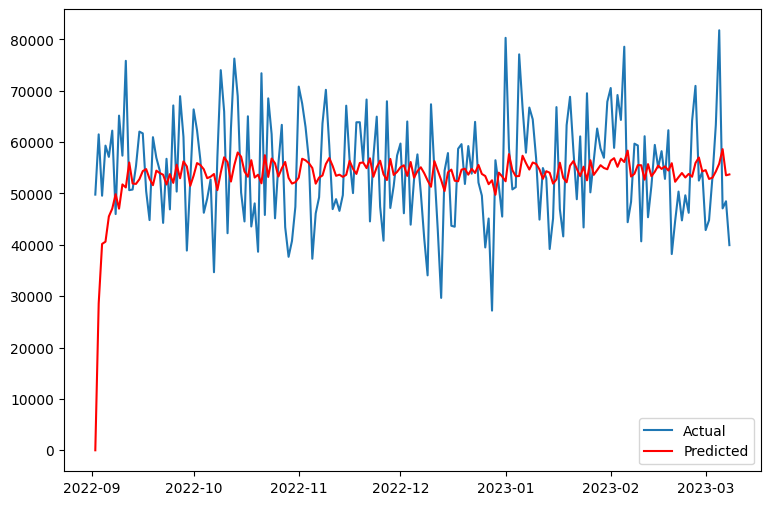

Mean Absolute Error (MAE): 9130.009696643952
Mean Squared Error (MSE): 130224215.92574713
Root Mean Squared Error (RMSE): 11411.582533800783


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# สร้างโมเดล ARIMA และฟิตโมเดล
model = ARIMA(test, order=(1, 1, 1))
result = model.fit()
plt.figure(figsize=(9,6))

# ทำนายค่าที่เกิดขึ้นแล้ว (in-sample prediction)
predict = result.predict(start=0, end=len(test)-1)

# สร้างกราฟเปรียบเทียบค่าจริงกับค่าทำนาย
plt.plot(test, label='Actual')
plt.plot(predict, label='Predicted', color='red')
plt.legend()
plt.show()

mae = mean_absolute_error(test, predict)
mse = mean_squared_error(test, predict)
rmse = np.sqrt(mse2)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
#forecast  by arima
#forecast = result.get_forecast(steps=ytest.shape[0])  # Forecast the next 10 time steps
#forecast.summary_frame()

total_purchase,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-03-09,52380.618487,11334.356179,30165.688589,74595.548386
2023-03-10,54187.614819,11462.402935,31721.717890,76653.511747
2023-03-11,54449.972974,11466.461293,31976.121809,76923.824139
2023-03-12,54488.064806,11466.785387,32013.578429,76962.551183
2023-03-13,54493.595367,11466.865864,32018.951258,76968.239476
...,...,...,...,...
2023-09-08,54494.534737,11475.212992,32003.530559,76985.538916
2023-09-09,54494.534737,11475.259575,32003.439256,76985.630219
2023-09-10,54494.534737,11475.306159,32003.347954,76985.721521
2023-09-11,54494.534737,11475.352742,32003.256652,76985.812822


In [ ]:
mean = forecast.summary_frame()['mean']
mean_lower = forecast.summary_frame()['mean_ci_lower']
mean_upper = forecast.summary_frame()['mean_ci_upper']
mean_se = forecast.summary_frame()['mean_se']

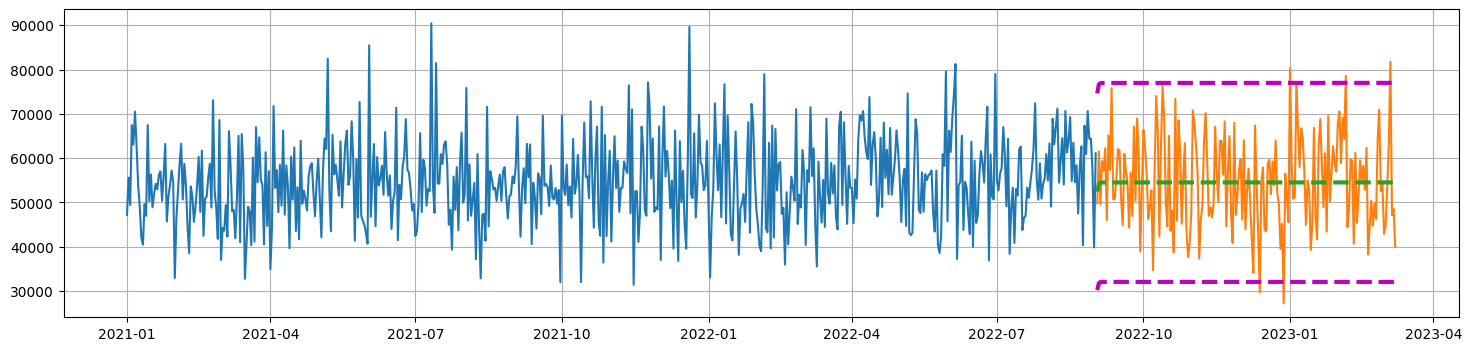

In [ ]:
plt.figure(figsize=(18,4))
plt.plot(xtrain,ytrain)
plt.plot(xtest,ytest)
plt.plot(xtest,mean,linewidth=3,linestyle='--')
plt.plot(xtest,mean_lower,linewidth=3,linestyle='--',color='m')
plt.plot(xtest,mean_upper,linewidth=3,linestyle='--',color='m')

plt.grid()
plt.show()

In [ ]:
print("this is y train :",ytrain.describe())
print("this is y test :",ytest.describe())

this is y train : count      609.000000
mean     54691.251691
std       9581.123058
min      31353.790000
25%      48170.100000
50%      54130.230000
75%      60695.870000
max      90448.140000
Name: total_purchase, dtype: float64
this is y test : count      188.000000
mean     54837.957500
std      10298.546061
min      27188.730000
25%      46821.217500
50%      54759.990000
75%      62386.320000
max      81760.480000
Name: total_purchase, dtype: float64


#Sarima model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



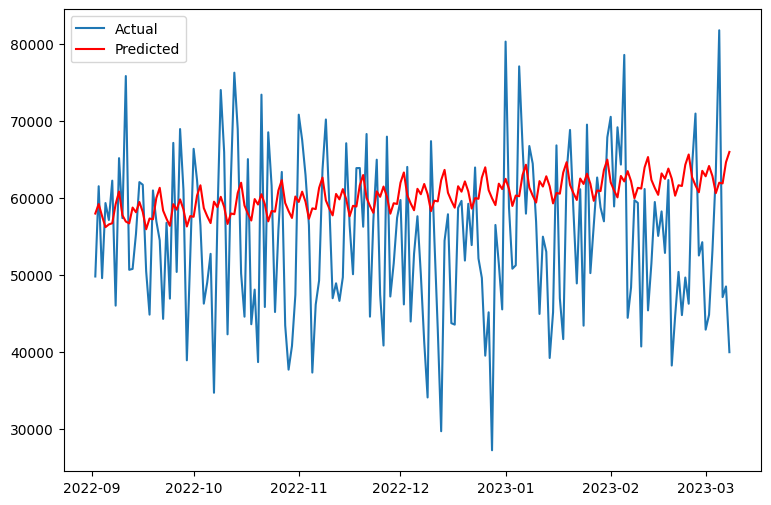

Mean Absolute Error (MAE): 9640.26121326656
Mean Squared Error (MSE): 139516983.32175604
Root Mean Squared Error (RMSE): 11811.730750476665


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# สมมติว่า 'train' คือข้อมูลฝึก (training data)
# และ 'test' คือข้อมูลทดสอบ (testing data)

# สร้างโมเดล SARIMA ด้วยข้อมูลฝึก
model = SARIMAX(train,
                order=(1, 1, 1),  # พารามิเตอร์ ARIMA (p, d, q)
                seasonal_order=(1, 1, 1, 12))  # พารามิเตอร์ฤดูกาล (P, D, Q, m)

# ฟิตโมเดลด้วยข้อมูลฝึก
result = model.fit()
plt.figure(figsize=(9,6))
# สรุปผลลัพธ์การฟิตโมเดล
#print(result.summary())

# ทำนายค่าด้วยข้อมูลทดสอบ
predict = result.predict(start=len(train), end=len(train)+len(test)-1)

# สร้างกราฟเปรียบเทียบค่าจริงกับค่าทำนาย
import matplotlib.pyplot as plt
plt.plot(test, label='Actual')
plt.plot(predict, label='Predicted', color='red')
plt.legend()
plt.show()

# คำนวณค่าความแม่นยำ
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, predict)
mse = mean_squared_error(test, predict)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [ ]:
!pip install prophet

In [ ]:
df_sale2.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'invoice_date', 'shopping_mall', 'total_purchase', 'gender', 'age',
       'payment_method', 'z_total_pur', 'sales_year'],
      dtype='object')

In [ ]:
df_sale2.head(3).sort_values('invoice_date')

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,total_purchase,gender,age,payment_method,z_total_pur,sales_year
0,I131698,C544568,Cosmetics,5,203.30,2021-01-01,Zorlu Center,1016.50,Female,35.0,Credit Card,-0.077694,2022
1,I206462,C749947,Shoes,1,600.17,2021-01-01,Kanyon,600.17,Female,39.0,Cash,-0.345790,2021
2,I229808,C118617,Clothing,3,900.24,2021-01-01,Mall of Istanbul,2700.72,Female,43.0,Cash,1.006861,2023


In [ ]:
len(test['total_purchase'])  # ตรวจสอบความยาวของข้อมูลที่ดึงมา


188

In [ ]:
all=train+test

In [ ]:
df_sale2 = df_sale2.dropna()


In [ ]:
#print(f"Number of non-NaN rows: {df_sale2.dropna().shape[0]}")


Number of non-NaN rows: 0


In [ ]:
# ตรวจสอบค่าที่เป็น NaN ในคอลัมน์ ds และ y
print(df_sale2['ds'].isna().sum())
print(df_sale2['y'].isna().sum())


0
797


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6fnk6nt/9xoixakt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6fnk6nt/9nqxbqs4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13708', 'data', 'file=/tmp/tmpj6fnk6nt/9xoixakt.json', 'init=/tmp/tmpj6fnk6nt/9nqxbqs4.json', 'output', 'file=/tmp/tmpj6fnk6nt/prophet_model7g2va78x/prophet_model-20240817075725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:57:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:57:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


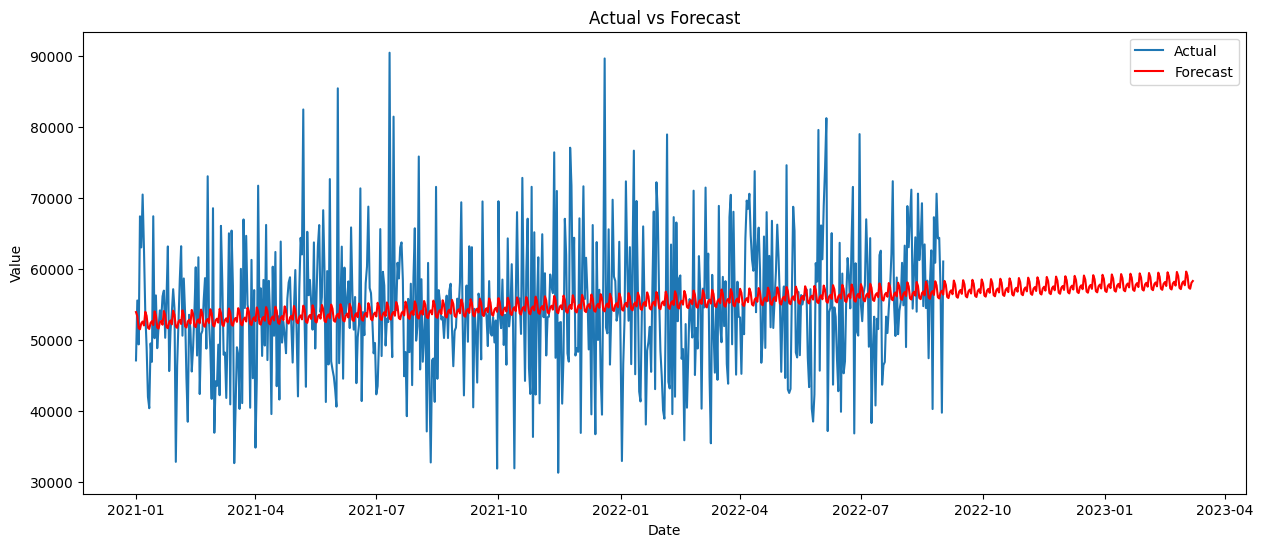

In [ ]:
from prophet import Prophet
import pandas as pd

# เตรียมข้อมูล
df_sale2= pd.DataFrame({
'ds': pd.date_range(start='2021-01-01', periods=609, freq='D'),  # ช่วงเวลา
    'y': train['total_purchase']  # ค่าจริง, extract the 1D array from the DataFrame
})


# สร้างโมเดล Prophet
model = Prophet()

# ฟิตโมเดล
model.fit(df_sale2)

# ทำนายข้อมูล
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# วาดกราฟ
plt.figure(figsize=(15, 6))

# วาดเส้นข้อมูลจริง
plt.plot(df_sale2['ds'], df_sale2['y'], label='Actual')

# วาดเส้นการพยากรณ์
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')

# เพิ่มชื่อกราฟและแกน
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')

# เพิ่ม legend
plt.legend()

# แสดงกราฟ
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# นำค่าทำนายมาใช้คำนวณความแม่นยำ
y_pred = forecast['yhat'][-len(test):].values

# คำนวณค่า MAE
mae = mean_absolute_error(test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# คำนวณค่า MSE
mse = mean_squared_error(test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# คำนวณค่า RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 8797.653218353169
Mean Squared Error (MSE): 115009020.15645668
Root Mean Squared Error (RMSE): 10724.225853480366


## K-Mean Clustering

In [ ]:
df_sale2.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'invoice_date', 'shopping_mall', 'total_purchase', 'gender', 'age',
       'payment_method', 'z_total_pur', 'Cluster'],
      dtype='object')

invoice_no                object
customer_id               object
category                  object
quantity                   int64
price                    float64
invoice_date      datetime64[ns]
shopping_mall             object
total_purchase           float64
gender                    object
age                      float64
payment_method            object
z_total_pur              float64
Cluster                    int32
dtype: object
invoice_no           0
customer_id          0
category             0
quantity             0
price                0
invoice_date      8696
shopping_mall        0
total_purchase       0
gender               0
age                  0
payment_method       0
z_total_pur          0
Cluster              0
dtype: int64
invoice_no                object
customer_id               object
category                  object
quantity                   int64
price                    float64
invoice_date      datetime64[ns]
shopping_mall             object
total_purchase

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



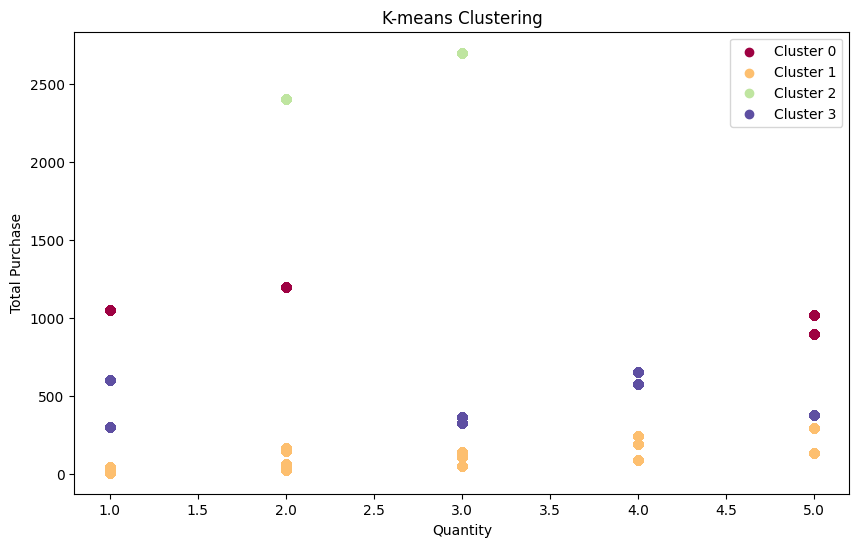

In [ ]:
import pandas as pd

# สมมติว่ามี DataFrame df_sale2
# df_sale2 = ...

# ตรวจสอบประเภทข้อมูลใน DataFrame
print(df_sale2.dtypes)

# ตรวจสอบค่าที่ขาดหายไป
print(df_sale2.isnull().sum())

# แปลงคอลัมน์ให้เป็นตัวเลข (หากจำเป็น)
# ตัวอย่าง: แปลงคอลัมน์ 'quantity', 'price', 'total_purchase', 'age', 'z_total_pur' ให้เป็นตัวเลข
df_sale2['quantity'] = pd.to_numeric(df_sale2['quantity'], errors='coerce')
df_sale2['price'] = pd.to_numeric(df_sale2['price'], errors='coerce')
df_sale2['total_purchase'] = pd.to_numeric(df_sale2['total_purchase'], errors='coerce')
df_sale2['age'] = pd.to_numeric(df_sale2['age'], errors='coerce')
df_sale2['z_total_pur'] = pd.to_numeric(df_sale2['z_total_pur'], errors='coerce')

# ลบแถวที่มีค่าที่ขาดหายไป
df_sale2.dropna(subset=['quantity', 'price', 'total_purchase', 'age', 'z_total_pur'], inplace=True)

# ตรวจสอบข้อมูลอีกครั้งหลังจากการแปลง
print(df_sale2.dtypes)
print(df_sale2.isnull().sum())

# เลือกคอลัมน์ที่ต้องการใช้ในการจัดกลุ่ม
X = df_sale2[['quantity', 'price', 'total_purchase', 'age', 'z_total_pur']].values

# ทำ K-means clustering ตามขั้นตอนที่ได้อธิบายไว้ก่อนหน้านี้
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# กำหนดจำนวนกลุ่ม (K)
k = 4  # ตัวอย่างการกำหนดจำนวนกลุ่ม

# สร้างโมเดล K-means
kmeans = KMeans(n_clusters=k, random_state=53)

# ฝึกโมเดล
kmeans.fit(X)

# รับป้ายชื่อกลุ่ม
labels = kmeans.labels_

# เพิ่มป้ายชื่อกลุ่มลงใน DataFrame
df_sale2['Cluster'] = labels

# แสดงผลลัพธ์
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    point = X[labels == label]
    plt.scatter(point[:, 0], point[:, 2], c=np.array([color]), marker='o', label=f'Cluster {label}')
plt.title('K-means Clustering')
plt.xlabel('Quantity')
plt.ylabel('Total Purchase')
plt.legend()
plt.show()